In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
suicidios = pd.read_csv("Datos suicidio.csv")

In [4]:
suicidios.info()
suicidios.head()
suicidios.drop(columns="Unnamed: 29",inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  228 non-null    object 
 1    1990         226 non-null    float64
 2   1991          226 non-null    float64
 3   1992          226 non-null    float64
 4   1993          226 non-null    float64
 5   1994          226 non-null    float64
 6   1995          226 non-null    float64
 7   1996          226 non-null    float64
 8   1997          226 non-null    float64
 9   1998          226 non-null    float64
 10  1999          226 non-null    float64
 11  2000          226 non-null    float64
 12  2001          226 non-null    float64
 13  2002          226 non-null    float64
 14  2003          226 non-null    float64
 15  2004          226 non-null    float64
 16  2005          226 non-null    float64
 17  2006          226 non-null    float64
 18  2007          226 non-null    

In [5]:
suicidios.dropna(thresh=20,inplace=True)

In [6]:
for columna in suicidios.columns:
    columna.strip()
    suicidios.rename(columns= {columna : columna.strip()},inplace = True)


In [7]:
suicidios.rename(columns= {"country_name": "Country"},inplace = True)


In [8]:
poblacion = pd.read_csv("Poblacion.csv")
continentes = pd.read_csv("countries_continents.csv")
df_cont = pd.merge(suicidios,continentes,on= "Country",how = "outer")
suicidios_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [9]:
suicidios_final.dropna(axis = 0,thresh=30,inplace=True)

In [10]:
suicidios_final.drop(columns="1990",inplace=True)

In [11]:
suicidios_long = suicidios_final.melt(id_vars=['Country', 'Continent', 'Population'],var_name='año',value_name='suicidios')

LIMPIO EL DATASET DE DESEMPLEO Y LE AÑADO LO PERTINENTE PARA UNIRLOS

In [12]:
desempleo= pd.read_csv("desempleo.csv")

In [13]:
desempleo.drop(columns={"Unnamed: 33"},inplace=True)

In [14]:
desempleo.drop(axis=1,columns={"2018","2019","2020","2021","2022"},inplace=True)

In [15]:
desempleo.dropna(how="all",inplace=True)
desempleo.rename(columns={"country_name":"Country"},inplace=True)

In [16]:
poblacion = pd.read_csv("Poblacion.csv")
continentes = pd.read_csv("countries_continents.csv")
df_cont = pd.merge(desempleo,continentes,on= "Country",how = "outer")
desempleo_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [17]:
desempleo_final.dropna(axis=0,thresh=30,inplace=True)

In [18]:
desempleo_long = desempleo_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='desempleo')

UNO LOS DATASET DE SUICIDIOS Y EL DE DESEMPLEO

In [19]:
suicidio_desempleo = pd.merge(suicidios_long,desempleo_long,how="inner",on=["Country","Continent","año"])

LIMPIO Y PREPARO EL DATASET DE ACCESO A LA SANIDAD PARA UNIRLO TAMBIÉN

In [20]:
sanidad = pd.read_csv("sanidad.csv")

In [21]:
sanidad.head()
sanidad.columns
sanidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  228 non-null    object 
 1    1990         226 non-null    float64
 2   1991          226 non-null    object 
 3   1992          226 non-null    object 
 4   1993          226 non-null    object 
 5   1994          226 non-null    object 
 6   1995          226 non-null    float64
 7   1996          226 non-null    object 
 8   1997          226 non-null    object 
 9   1998          226 non-null    object 
 10  1999          226 non-null    object 
 11  2000          226 non-null    float64
 12  2001          226 non-null    object 
 13  2002          226 non-null    object 
 14  2003          226 non-null    object 
 15  2004          226 non-null    object 
 16  2005          226 non-null    float64
 17  2006          226 non-null    object 
 18  2007          226 non-null    

In [22]:
for columna in sanidad.columns:
    columna.strip()
    sanidad.rename(columns= {columna : columna.strip()},inplace = True)

In [23]:
sanidad.drop(columns={"1990","Unnamed: 27"},inplace=True)

In [24]:
for columna in sanidad.select_dtypes(include=['object']).columns:
    sanidad[columna] = sanidad[columna].str.replace('*', '', regex=False) 

In [25]:
sanidad.rename(columns={"country_name":"Country"},inplace=True)

In [26]:
df_cont = pd.merge(sanidad,continentes,on= "Country",how = "outer")
sanidad_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [27]:
sanidad_final.dropna(thresh=28,inplace=True)

In [28]:
sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]] = sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]].astype(float)

In [29]:
sanidad_long = sanidad_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='sanidad')

UNO EL DATASET SANIDAD A LA UNIÓN DE LOS OTROS DOS

In [30]:
suicidio_desempleo_sanidad = pd.merge(suicidio_desempleo,sanidad_long,how="inner",on=["Country","Continent","año"])

In [31]:
suicidio_desempleo_sanidad

,Country,Continent,Population,año,suicidios,desempleo,sanidad
0,Afghanistan,Asia,38928341.0,1992,6.979,7.940,24.620
1,Albania,Europe,2877797.0,1992,3.767,30.007,63.480
2,Algeria,Africa,43851044.0,1992,4.106,24.380,49.960
3,Angola,Africa,32866272.0,1992,8.817,16.621,26.720
4,Argentina,South America,45376763.0,1992,10.684,6.360,58.560
...,...,...,...,...,...,...,...
4243,Vietnam,Asia,97338583.0,2015,7.675,1.849,66.3
4244,Virgin Islands (U.S.),North America,104000.0,2015,8.707,12.146,70.2
4245,Yemen,Asia,29825964.0,2015,4.709,17.900,49.6
4246,Zambia,Africa,18383955.0,2015,6.563,8.316,41.6


LIMPIO Y PREPARO EL DATASET DE WORLD HAPPINESS REPORT

In [32]:
felicidad = pd.read_csv("World Happiness Report.csv")

In [33]:
felicidad.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [34]:
felicidad = felicidad[["Country Name","Year","Social Support","Freedom To Make Life Choices"]]

In [35]:
felicidad.rename(columns={"Country Name":"Country"},inplace=True)

In [36]:
felicidad.info()
felicidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2199 non-null   object 
 1   Year                          2199 non-null   int64  
 2   Social Support                2186 non-null   float64
 3   Freedom To Make Life Choices  2166 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 68.8+ KB


,Country,Year,Social Support,Freedom To Make Life Choices
0,Afghanistan,2008,0.450662,0.718114
1,Afghanistan,2009,0.552308,0.678896
2,Afghanistan,2010,0.539075,0.600127
3,Afghanistan,2011,0.521104,0.495901
4,Afghanistan,2012,0.520637,0.530935


In [37]:
felicidad_ordenada = felicidad.pivot_table(index=['Country', 'Year'],values=['Social Support', 'Freedom To Make Life Choices'],aggfunc='mean')


In [38]:
felicidad_ordenada

Freedom To Make Life Choices  Social Support
Country     Year                                              
Afghanistan 2008                      0.718114        0.450662
            2009                      0.678896        0.552308
            2010                      0.600127        0.539075
            2011                      0.495901        0.521104
            2012                      0.530935        0.520637
...                                        ...             ...
Zimbabwe    2018                      0.762675        0.775388
            2019                      0.631908        0.759162
            2020                      0.643303        0.717243
            2021                      0.667636        0.685151
            2022                      0.651987        0.666172

[2193 rows x 2 columns]

LIMPIO Y PREPARO EL DATASET DE PREVALENCIA DE LA DEPRESIÓN

In [39]:
depresion = pd.read_csv("depresion.csv")

In [40]:
depresion.columns

Index(['country_name', ' 1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Unnamed: 28'],
      dtype='object')

In [41]:
for columna in depresion.columns:
    columna.strip()
    depresion.rename(columns= {columna : columna.strip()},inplace = True)

In [42]:
depresion.drop(columns={"1990",'Unnamed: 28'},inplace=True)

In [43]:
depresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  233 non-null    object 
 1   1991          232 non-null    float64
 2   1992          232 non-null    float64
 3   1993          232 non-null    float64
 4   1994          232 non-null    float64
 5   1995          232 non-null    float64
 6   1996          232 non-null    float64
 7   1997          232 non-null    float64
 8   1998          232 non-null    float64
 9   1999          232 non-null    float64
 10  2000          232 non-null    float64
 11  2001          232 non-null    float64
 12  2002          232 non-null    float64
 13  2003          232 non-null    float64
 14  2004          232 non-null    float64
 15  2005          232 non-null    float64
 16  2006          232 non-null    float64
 17  2007          232 non-null    float64
 18  2008          232 non-null    

In [44]:
depresion.rename(columns={"country_name":"Country"},inplace=True)

In [45]:
depresion.dropna(thresh=20,inplace=True)

In [46]:
df_cont = pd.merge(depresion,continentes,on= "Country",how = "outer")
depresion_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [47]:
depresion_final.dropna(thresh=28,inplace=True)

In [48]:
depresion_long = depresion_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='depresion')

UNO LA ÚLTIMA VARIABLE A EL DATASET CON LAS VARIABLES SUICIDIOS SANIDAD Y DESEMPLEO

In [49]:
variables = pd.merge(suicidio_desempleo_sanidad,depresion_long,how="inner",on=["Country","Continent","año"])

In [50]:
variables["sanidad"] = variables["sanidad"].astype(float)

YA TENGO LOS DOS DATA SETS CON LOS QUE VOY A TRABAJAR LIMPIOS: VARIABLES Y WORLD HAPPINESS REPORT

In [51]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4248 non-null   object 
 1   Continent   4248 non-null   object 
 2   Population  4248 non-null   float64
 3   año         4248 non-null   object 
 4   suicidios   4248 non-null   float64
 5   desempleo   4248 non-null   float64
 6   sanidad     4248 non-null   float64
 7   depresion   4248 non-null   float64
dtypes: float64(5), object(3)
memory usage: 265.6+ KB


In [52]:
felicidad_ordenada.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2193 entries, ('Afghanistan', np.int64(2008)) to ('Zimbabwe', np.int64(2022))
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Freedom To Make Life Choices  2166 non-null   float64
 1   Social Support                2186 non-null   float64
dtypes: float64(2)
memory usage: 46.3+ KB


ESTADÍSTICOS Y GRÁFICOS:

HIPÓTESIS 1 : Los diagnósticos de depresión han ido aumentado progresivamente a nivel global desde la década de 1990

In [53]:
variables.groupby(["Continent","año"])[["depresion"]].mean()

depresion
Continent     año            
Africa        1992   3.064235
              1993   3.069333
              1994   3.077510
              1995   3.092020
              1996   3.095176
...                       ...
South America 2011   3.463417
              2012   3.479000
              2013   3.495000
              2014   3.513333
              2015   3.529917

[168 rows x 1 columns]

Esto me proporciona una media por continente con los valores de los paises pero sin tener en cuenta la poblacion de cada uno. Utilizaré otro método para obtener una media relativa

In [66]:
variables["personas depresion"] = (variables["depresion"]*variables["Population"]/100)
variables["total personas continente"]=variables.groupby(["año","Continent"])["Population"].transform("sum")
variables["peso_ponderacion"] = variables["Population"]/variables["total personas continente"] 
variables["depresion ponderada"] = variables["personas depresion"]*variables["peso_ponderacion"]
variables["porcentaje depresion"] = (variables.groupby(["año","Continent"])["personas depresion"].transform("sum")/variables["total personas continente"])*100

In [ ]:
variables.groupby(["año","Continent"])["Population"].transform("sum")

In [95]:
años = ["1992","1995","2000","2005","2010","2015"]
porcentajes_por_años = variables[variables["año"].isin(años)][["porcentaje depresion","Continent","año"]]
resultados = porcentajes_por_años.groupby(["Continent","año"])["porcentaje depresion"].mean()

In [ ]:
resultados = pd.DataFrame(resultados)
resultados

In [114]:
tabla_depresion = resultados.pivot_table(index="Continent",columns="año",values="porcentaje depresion")
tabla_depresion

año,1992,1995,2000,2005,2010,2015
Continent,,,,,,
Africa,3.092726,3.116611,3.167933,3.183837,3.196640,3.198226
Asia,3.178740,3.234092,3.348817,3.511057,3.585956,3.696958
Australia,4.388288,4.480230,4.482826,4.608488,4.586876,4.517985
Europe,4.503366,4.499122,4.501684,4.478575,4.519870,4.522966
Europe/Asia,4.125233,4.240131,4.390347,4.448885,4.392574,4.427046
North America,4.215517,4.244367,4.404154,4.432546,4.376031,4.422848
South America,3.098492,3.174157,3.602922,3.723705,3.447097,3.449449


In [ ]:
tabla_larga = tabla_depresion.reset_index().melt(id_vars="Continent", var_name="Año",value_name="Porcentaje depresion")
tabla_larga

TABLA HIPÓTESIS 1, CONTINENTES CON MÁS PREVALENCIA

(4.1, 4.65)

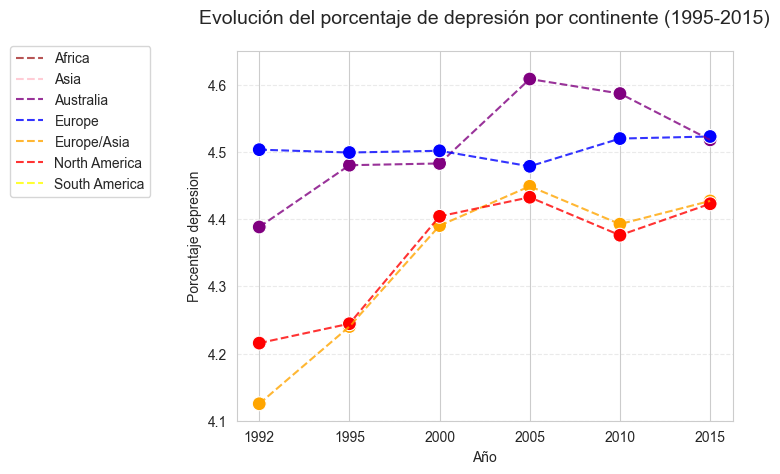

In [ ]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt. ylim(4.1,4.65)


TABLA HIPÓTESIS 1, CONTINENTES MENOS PREVALENCIA

(3.05, 3.75)

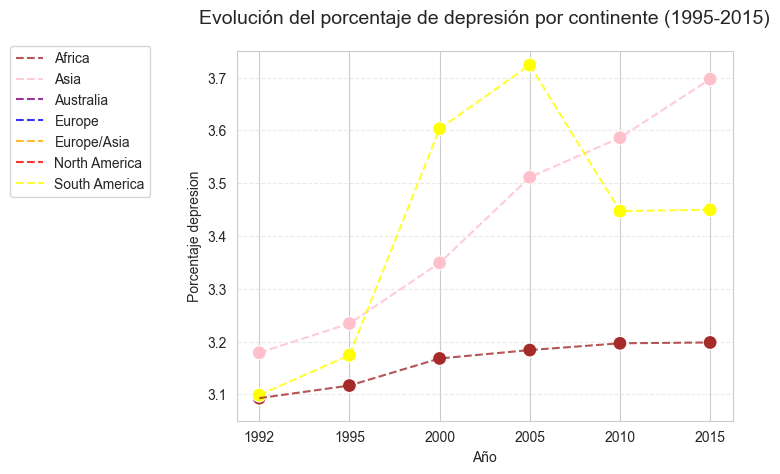

In [164]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt.ylim(3.05,3.75)

HIPÓTESIS 2: Los países con tasas más altas de trastornos depresivos serán también los países con los datos más altos de suicidio. 

In [ ]:
variables["suicidios totales"] = (variables["Population"]/100000)*variables["suicidios"]
variables

In [ ]:
variables.groupby(["año"])[["depresion"]].idxmax()

In [188]:
suicidios_depresion = variables[variables["año"].isin(años)][["depresion","Country","año","suicidios"]]
suicidios_depresion

,depresion,Country,año,suicidios
0,3.190,Afghanistan,1992,6.979
1,2.075,Albania,1992,3.767
2,3.110,Algeria,1992,4.106
3,3.310,Angola,1992,8.817
4,3.681,Argentina,1992,10.684
...,...,...,...,...
4243,3.183,Vietnam,2015,7.675
4244,3.990,Virgin Islands (U.S.),2015,8.707
4245,3.340,Yemen,2015,4.709
4246,2.711,Zambia,2015,6.563


In [199]:
tabla_relacion_suicidios_depresion = suicidios_depresion.groupby(["Country","año"])[["depresion","suicidios"]].mean()

In [213]:
tablasd = tabla_relacion_suicidios_depresion.pivot_table(index="Country",columns="año",values=["depresion","suicidios"])
tablasd

depresion                                    suicidios  \
año                        1992   1995   2000   2005   2010   2015      1992   
Country                                                                        
Afghanistan               3.190  3.236  3.196  3.212  3.206  3.296     6.979   
Albania                   2.075  2.114  2.236  2.415  2.565  2.710     3.767   
Algeria                   3.110  3.158  3.281  3.468  3.592  3.740     4.106   
Angola                    3.310  3.334  3.299  3.255  3.229  3.212     8.817   
Argentina                 3.681  3.748  3.820  3.841  3.842  3.875    10.684   
...                         ...    ...    ...    ...    ...    ...       ...   
Vietnam                   2.584  2.632  2.740  2.893  3.058  3.183     7.578   
Virgin Islands (U.S.)     3.264  3.371  3.481  3.701  3.880  3.990     6.252   
Yemen                     3.010  3.059  3.064  3.161  3.259  3.340     4.612   
Zambia                    2.681  2.716  2.655  2.652  2.617  2.711     8.723   
Zimbabwe                  2.333  2.382  2.366  2.393  2.391  2.447    10.088   

                                                               
año                      1995    2000    2005    2010    2015  
Country                                                        
Afghanistan             6.766   6.536   6.008   5.542   5.289  
Albania                 3.743   4.706   5.733   5.717   5.887  
Algeria                 4.491   4.947   4.894   4.591   4.392  
Angola                  8.982   8.322   7.505   6.741   6.242  
Argentina              11.541  12.498  11.256  11.343  11.255  
...                       ...     ...     ...     ...     ...  
Vietnam                 7.624   7.396   7.500   7.541   7.675  
Virgin Islands (U.S.)   6.426   6.848   6.881   7.736   8.707  
Yemen                   4.839   4.952   4.900   4.762   4.709  
Zambia                  9.364   8.213   6.851   6.542   6.563  
Zimbabwe               12.687  19.407  23.406  21.334  18.222  

[177 rows x 12 columns]

In [235]:
media_mundial_suicidios_2015 = tablasd[("suicidios","2015")].mean()
media_mundial_suicidios_1995 = tablasd[("suicidios","1995")].mean()

In [231]:
top3_paises_depresion_2015 = tablasd[("depresion","2015")].nlargest(3)

In [230]:
top3_paises_depresion_suicidios_2015 = tablasd.loc[tablasd[("depresion","2015")].nlargest(3).index,("suicidios","2015")]

GRÁFICO PARA VER RELACION SUICIDIOS VS DEPRESIÓN 1995


In [229]:
top3_paises_depresion_1995 = tablasd[("depresion","1995")].nlargest(3)

In [241]:
top3_paises_depresion_1995

Country
Finland    6.256
Sweden     5.659
Ukraine    5.566
Name: (depresion, 1995), dtype: float64

In [228]:
top3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nlargest(3).index,("suicidios","1995")]

In [238]:
top3_paises_depresion_suicidios_1995.index

Index(['Finland', 'Sweden', 'Ukraine'], dtype='object', name='Country')

In [242]:
data_top_1995 = pd.DataFrame({"Pais":top3_paises_depresion_suicidios_1995.index,"Depresion":[top3_paises_depresion_1995[0],top3_paises_depresion_1995[1],top3_paises_depresion_1995[2]],"Suicidios":[top3_paises_depresion_suicidios_1995[0],top3_paises_depresion_suicidios_1995[1],top3_paises_depresion_suicidios_1995[2]]})

C:\Users\rafac\AppData\Local\Temp\ipykernel_22500\981883912.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_top_1995 = pd.DataFrame({"Pais":top3_paises_depresion_suicidios_1995.index,"Depresion":[top3_paises_depresion_1995[0],top3_paises_depresion_1995[1],top3_paises_depresion_1995[2]],"Suicidios":[top3_paises_depresion_suicidios_1995[0],top3_paises_depresion_suicidios_1995[1],top3_paises_depresion_suicidios_1995[2]]})


In [243]:
data_top_1995

,Pais,Depresion,Suicidios
0,Finland,6.256,27.772
1,Sweden,5.659,19.439
2,Ukraine,5.566,37.099


Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (top 3 países 1995)')

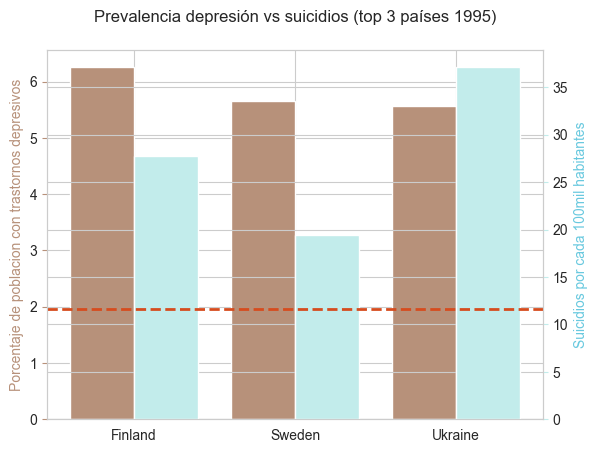

In [258]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_top_1995)) -0.2,height = data_top_1995["Depresion"],data= data_top_1995,width=0.4,color ="#b7917a",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "#b7917a")
ax1.tick_params(axis="y",color="#b7917a")
ax1.set_xticks(np.arange(len(data_top_1995)))
ax1.set_xticklabels(data_top_1995["Pais"])
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_top_1995))+0.2,height = data_top_1995["Suicidios"],data= data_top_1995,width=0.4,color ="#c2eceb",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "#69c9df")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#d64c1e",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.title("Prevalencia depresión vs suicidios (top 3 países 1995)",pad = 20)

AHORA CON EL TOP 3 PAISES CON MENOS PREVALENCIA 

In [259]:
Low3_paises_depresion_1995 = tablasd[("depresion","1995")].nsmallest(3)

In [260]:
Low3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nsmallest(3).index,("suicidios","1995")]

In [261]:
data_low_1995 = pd.DataFrame({"Pais":Low3_paises_depresion_suicidios_1995.index,"Depresion":[Low3_paises_depresion_1995[0],Low3_paises_depresion_1995[1],Low3_paises_depresion_1995[2]],"Suicidios":[Low3_paises_depresion_suicidios_1995[0],Low3_paises_depresion_suicidios_1995[1],Low3_paises_depresion_suicidios_1995[2]]})

C:\Users\rafac\AppData\Local\Temp\ipykernel_22500\3467837055.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_low_1995 = pd.DataFrame({"Pais":Low3_paises_depresion_suicidios_1995.index,"Depresion":[Low3_paises_depresion_1995[0],Low3_paises_depresion_1995[1],Low3_paises_depresion_1995[2]],"Suicidios":[Low3_paises_depresion_suicidios_1995[0],Low3_paises_depresion_suicidios_1995[1],Low3_paises_depresion_suicidios_1995[2]]})


In [262]:
data_low_1995

,Pais,Depresion,Suicidios
0,Myanmar (Burma),1.977,6.669
1,Honduras,2.073,3.965
2,Albania,2.114,3.743


Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (top 3 países 1995)')

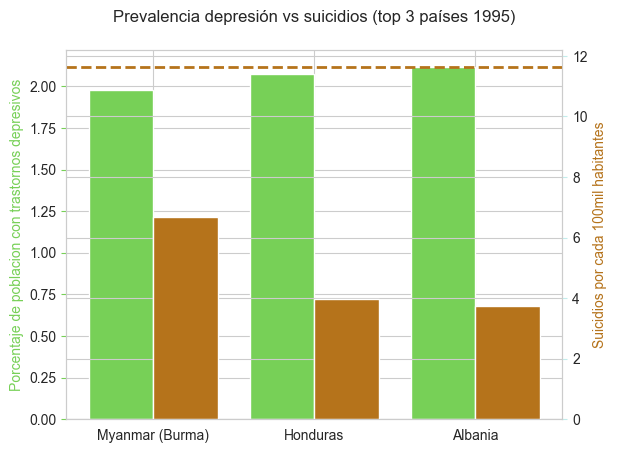

In [264]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_low_1995)) -0.2,height = data_low_1995["Depresion"],data= data_low_1995,width=0.4,color ="#77D057",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "#77D057")
ax1.tick_params(axis="y",color="#77D057")
ax1.set_xticks(np.arange(len(data_low_1995)))
ax1.set_xticklabels(data_low_1995["Pais"])
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_low_1995))+0.2,height = data_low_1995["Suicidios"],data= data_low_1995,width=0.4,color ="#B5731B",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "#B5731B")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#B5731B",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.title("Prevalencia depresión vs suicidios (top 3 países 1995)",pad = 20)

VISTOS LOS RESULTADOS, VAMOS A VER LA CORRELACIÓN ENTRE VARIABLES(SUICIDIOS CADA 100 MIL HABITANTES VS PREVALENCIA TRASTORNOS DEPRESIVOS)

In [272]:
variables["suicidios totales"].corr(variables["personas depresion"])

np.float64(0.9326388428475606)

In [273]:
variables["depresion"].corr(variables["suicidios"])

np.float64(0.5213141386874747)

<Axes: xlabel='suicidios', ylabel='depresion'>

<Figure size 640x480 with 0 Axes>

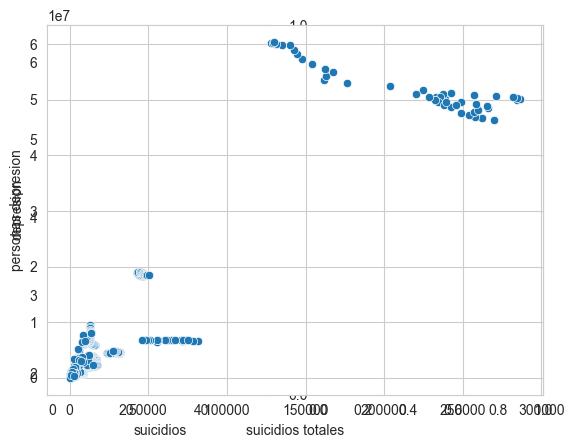